In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.metrics import r2_score
import copy


In [3]:
# import File
df_old = pd.read_csv('./loan_old.csv')
print(df_old.head())

    Loan_ID Gender Married Dependents     Education  Income  \
0  LP001002   Male      No          0      Graduate    5849   
1  LP001003   Male     Yes          1      Graduate    4583   
2  LP001005   Male     Yes          0      Graduate    3000   
3  LP001006   Male     Yes          0  Not Graduate    2583   
4  LP001008   Male      No          0      Graduate    6000   

   Coapplicant_Income  Loan_Tenor  Credit_History Property_Area  \
0                 0.0       144.0             1.0         Urban   
1              1508.0       144.0             1.0         Rural   
2                 0.0       144.0             1.0         Urban   
3              2358.0       144.0             1.0         Urban   
4                 0.0       144.0             1.0         Urban   

   Max_Loan_Amount Loan_Status  
0              NaN           Y  
1           236.99           N  
2            81.20           Y  
3           179.03           Y  
4           232.40           Y  


In [4]:
print(df_old.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Income              614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Tenor          599 non-null    float64
 8   Credit_History      564 non-null    float64
 9   Property_Area       614 non-null    object 
 10  Max_Loan_Amount     589 non-null    float64
 11  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None


             Income  Coapplicant_Income  Loan_Tenor  Credit_History  \
count    614.000000          614.000000  599.000000      564.000000   
mean    5403.459283         1621.245798  137.689482        0.842199   
std     6109.041673         2926.248369   23.366294        0.364878   
min      150.000000            0.000000   12.000000        0.000000   
25%     2877.500000            0.000000  144.000000        1.000000   
50%     3812.500000         1188.500000  144.000000        1.000000   
75%     5795.000000         2297.250000  144.000000        1.000000   
max    81000.000000        41667.000000  192.000000        1.000000   

       Max_Loan_Amount  
count       589.000000  
mean        230.499474  
std         161.976967  
min          12.830000  
25%         123.990000  
50%         190.370000  
75%         276.500000  
max         990.490000  


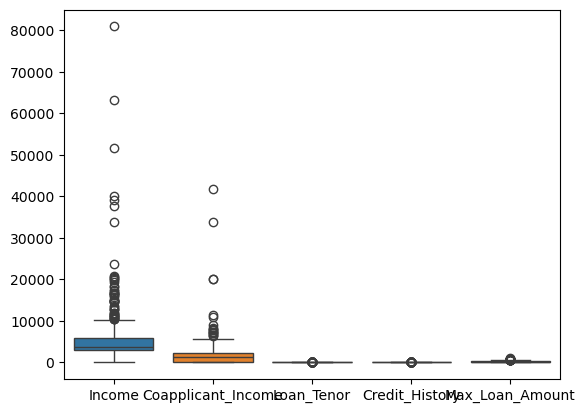

In [5]:
print(df_old.describe())
sns.boxplot(df_old)
plt.show()

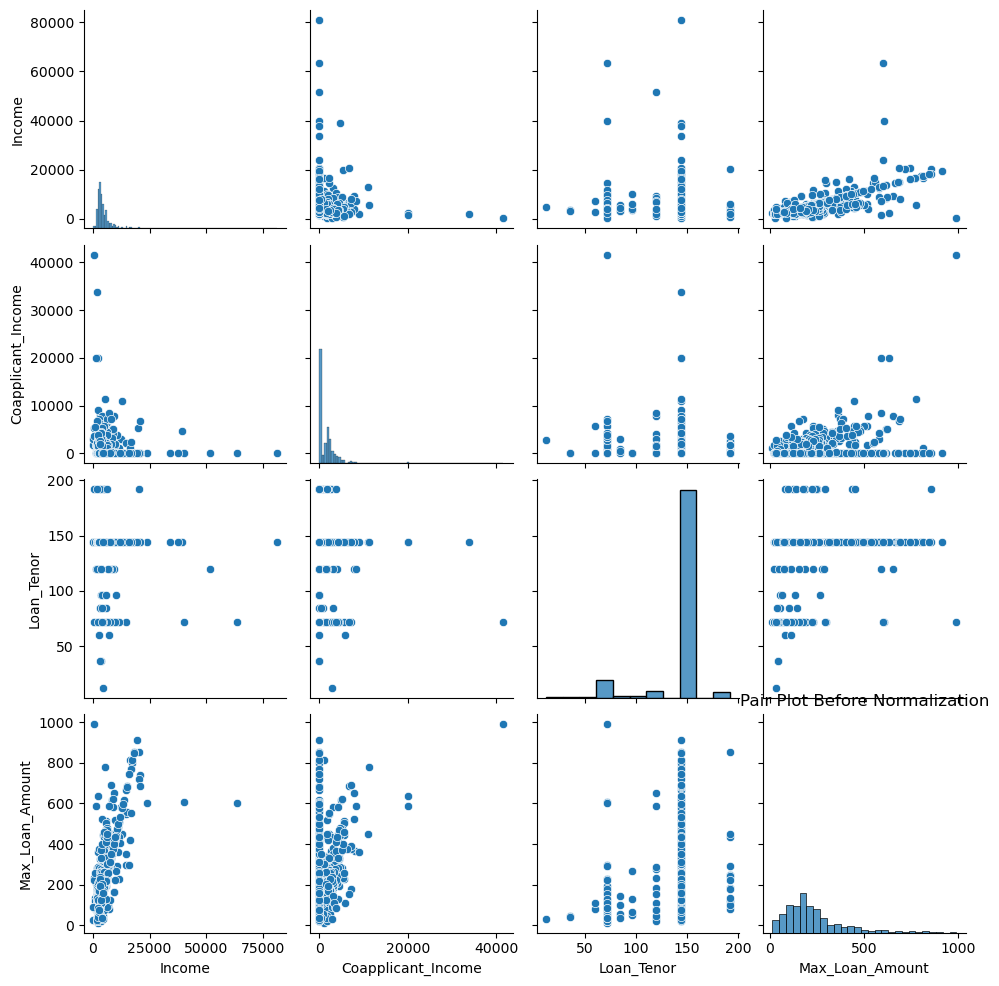

In [6]:
df_old['Credit_History'] = df_old['Credit_History'].astype('category')

# Handle missing or infinite values
df_old.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot pairplot
sns.pairplot(df_old[['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History', 'Max_Loan_Amount']])
plt.title('Pair Plot Before Normalization')
plt.show()

In [7]:
print(df_old.isna().sum())

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor            15
Credit_History        50
Property_Area          0
Max_Loan_Amount       25
Loan_Status            0
dtype: int64


In [8]:
#treshold=len(df_old)*0.05
#drop_col=df_old.columns[df_old.isna().sum()<=treshold]
#print(drop_col)
#df_old.dropna(subset=drop_col,inplace=True)

In [9]:
df_old = df_old.dropna(axis=0)
print(df_old.isna().sum())

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Income                0
Coapplicant_Income    0
Loan_Tenor            0
Credit_History        0
Property_Area         0
Max_Loan_Amount       0
Loan_Status           0
dtype: int64


In [10]:
#df_old['Credit_History'].fillna(df_old['Credit_History'].mode()[0], inplace=True)

In [11]:
#print(df_old.isna().sum())

In [12]:
print(df_old.shape)

(513, 12)


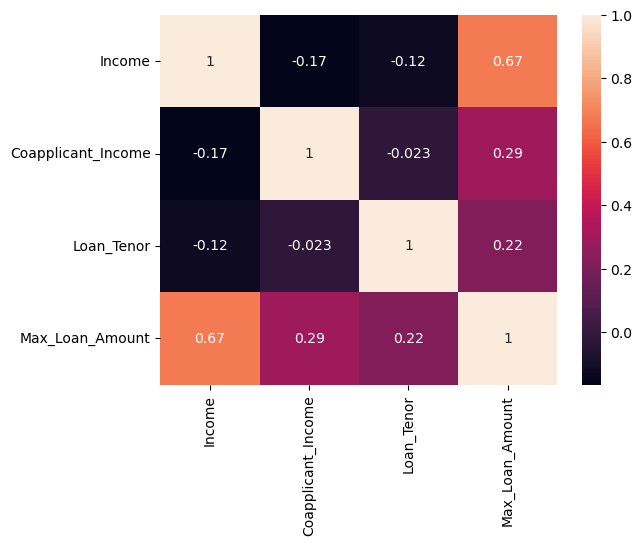

In [13]:
sns.heatmap(df_old.corr(numeric_only = True),annot=True)
plt.show()

In [14]:
X = df_old.drop(['Max_Loan_Amount', 'Loan_Status','Loan_ID'], axis=1)
y_amount = df_old['Max_Loan_Amount']
y_status = df_old['Loan_Status']

In [15]:
X_train, X_test, y_amount_train, y_amount_test,y_status_train, y_status_test = train_test_split(
    X, y_amount,y_status, test_size=0.2, random_state=132
)


In [16]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Property_Area']
encoder = LabelEncoder()
for feature in categorical_features:
    X_train[feature] = encoder.fit_transform(X_train[feature])
    X_test[feature] = encoder.transform(X_test[feature])

In [17]:
scaler = StandardScaler()
X_train[['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History']] = scaler.fit_transform(X_train[['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History']])
X_test[['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History']] = scaler.transform(X_test[['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History']])

In [18]:
#sns.pairplot(X_train_scaled[['Income', 'Coapplicant_Income', 'Loan_Tenor', 'Credit_History']])
#plt.title('After Normalization')
#plt.show()

In [19]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_amount_train)

LinearRegression()

In [20]:
y_amount_pred = linear_reg_model.predict(X_test)
r2 = r2_score(y_amount_test, y_amount_pred)
print("Linear Regression R2 Score:", r2)

Linear Regression R2 Score: 0.8016098792290257


In [21]:
y_status_train = y_status_train.map({'Y': 1, 'N': 0})
y_status_test = y_status_test.map({'Y': 1, 'N': 0})

In [22]:
#one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
#y_status_train_one_hot = one_hot_encoder.fit_transform(y_status_train.values.reshape(-1, 1))
#y_status_test_one_hot = one_hot_encoder.transform(y_status_test.values.reshape(-1, 1))


categorical_features = ['Loan_Status']
encoder = LabelEncoder()

for feature in categorical_features:
    y_status_train = encoder.fit_transform(y_status_train)
    y_status_test = encoder.transform(y_status_test)


In [23]:
import numpy as np
def sigmoid(z):
    try:
        g = 1 / ( 1 + np.exp(-z) )
    except:
        print(z, flush=True)
    return g

def regularize(x):
    mu = np.average(x)
    sigma = np.std(x)
    return (x - mu) / sigma

def regularizeAll(x):
    for j in range(x.shape[1]):
        x[:, j] = regularize(x[:, j])

def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = X.shape[0]
    for i in range(num_iterations):
        z = np.dot(X, w) + b 
        y_pred = sigmoid(np.array(z, dtype=np.float64))
        dw = (1/m)*np.dot(X.T, (y_pred - y))
        db = (1/m)*np.sum(y_pred - y)
        w = w - learning_rate * dw
        b = b - learning_rate * db
    return w, b

def predict(X, w, b):
    regularizeAll(X)
    z = np.array(np.dot(X, w) + b, dtype=np.float64)
    y_pred = sigmoid(z)
    predictions=[0 if y< 0.5 else 1 for y in y_pred]
    return predictions

def fit(X,y,learning_rate,num_iterations):
    regularizeAll(X)
    w = np.zeros((X.shape[1],))
    b = 0
    weights,bais=gradient_descent(X,y,w,b,learning_rate,num_iterations)
    return weights,bais

def accuracy(y_pred,y_test):
    return np.sum(y_pred==y_test)/len(y_test)

In [24]:
w, b = fit(X_train.values, y_status_train, 0.01, 4000)
print(w,b)

[ 0.12045525  0.24292605  0.07490991 -0.22391106 -0.01012666  0.13849426
  0.03199019  1.25757116  0.004548  ] 0.9586140875356093


In [25]:
y_pred = np.array(predict(X_test.values, w, b))
print(accuracy(y_pred, y_status_test))

0.7669902912621359


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(C=1e5, max_iter=4000,solver='liblinear')
lr.fit(X_train ,y_status_train)
print(lr.coef_ , lr.intercept_) 
y_lr_pred = lr.predict(X_test)
print(classification_report(y_status_test, y_lr_pred, zero_division=1))

[[ 0.30718132  0.50970211  0.07540032 -0.55501329 -0.00924447  0.14443571
   0.03250855  1.26955748  0.00661237]] [0.42734427]
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        37
           1       0.73      1.00      0.85        66

    accuracy                           0.77       103
   macro avg       0.87      0.68      0.68       103
weighted avg       0.83      0.77      0.73       103



In [27]:
df_new = pd.read_csv('./loan_new.csv')
print(df_new.head())

    Loan_ID Gender Married Dependents     Education  Income  \
0  LP001015   Male     Yes          0      Graduate    5720   
1  LP001022   Male     Yes          1      Graduate    3076   
2  LP001031   Male     Yes          2      Graduate    5000   
3  LP001035   Male     Yes          2      Graduate    2340   
4  LP001051   Male      No          0  Not Graduate    3276   

   Coapplicant_Income  Loan_Tenor  Credit_History Property_Area  
0                   0       144.0             1.0         Urban  
1                1500       144.0             1.0         Urban  
2                1800       144.0             1.0         Urban  
3                2546       144.0             NaN         Urban  
4                   0       144.0             1.0         Urban  


In [28]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             367 non-null    object 
 1   Gender              356 non-null    object 
 2   Married             367 non-null    object 
 3   Dependents          357 non-null    object 
 4   Education           367 non-null    object 
 5   Income              367 non-null    int64  
 6   Coapplicant_Income  367 non-null    int64  
 7   Loan_Tenor          360 non-null    float64
 8   Credit_History      338 non-null    float64
 9   Property_Area       367 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 28.8+ KB
None


             Income  Coapplicant_Income  Loan_Tenor  Credit_History
count    367.000000          367.000000  360.000000      338.000000
mean    4805.599455         1569.577657  138.188889        0.825444
std     4910.685399         2334.232099   22.460560        0.380150
min        0.000000            0.000000   12.000000        0.000000
25%     2864.000000            0.000000  144.000000        1.000000
50%     3786.000000         1025.000000  144.000000        1.000000
75%     5060.000000         2430.500000  144.000000        1.000000
max    72529.000000        24000.000000  192.000000        1.000000


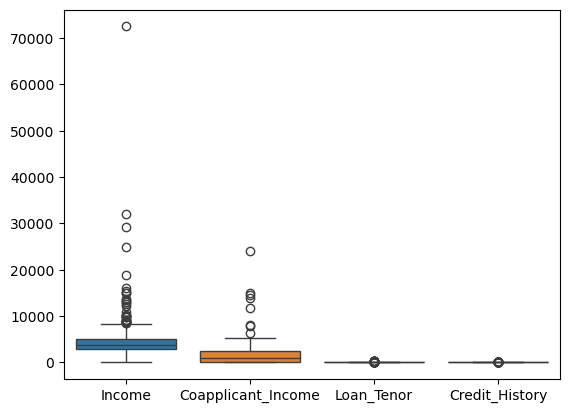

In [29]:
print(df_new.describe())
sns.boxplot(df_new)
plt.show()

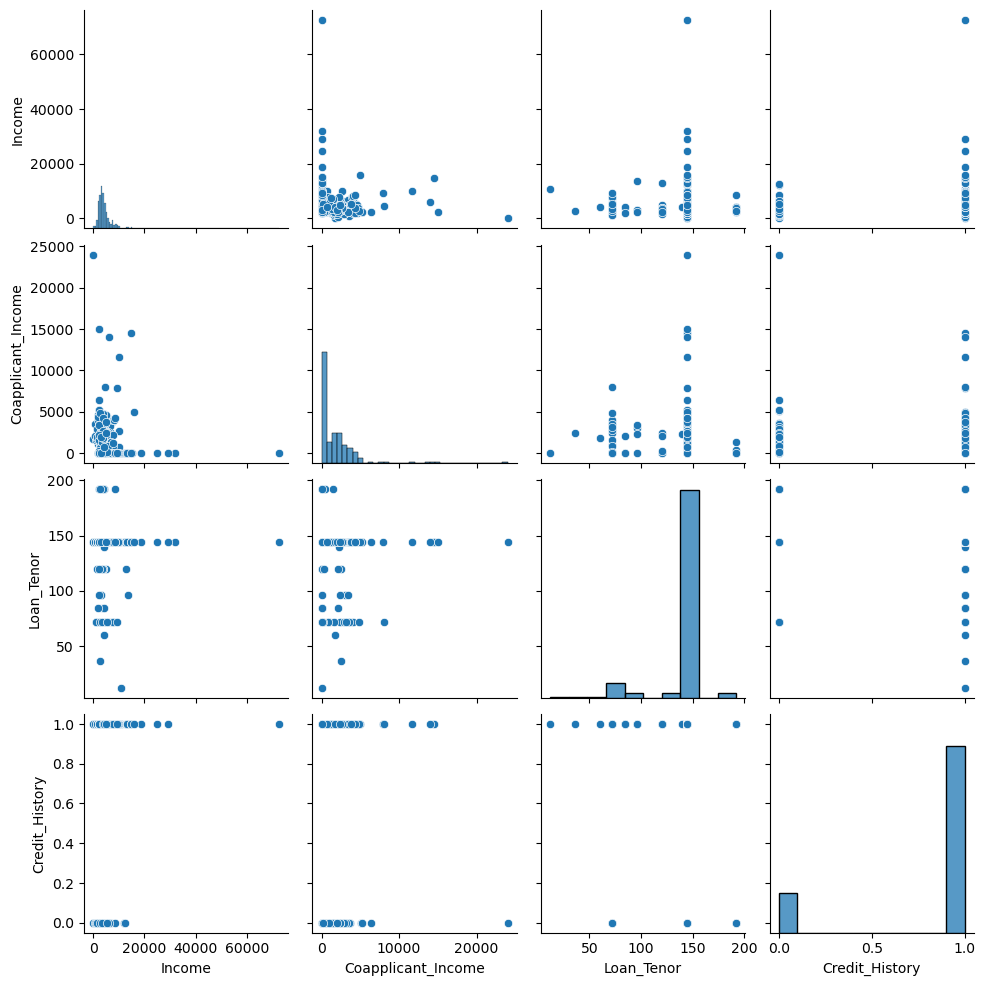

In [30]:
sns.pairplot(df_new)
plt.show()

In [31]:
print(df_new.isna().sum())

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor             7
Credit_History        29
Property_Area          0
dtype: int64


In [32]:
df_new = df_new.dropna()
print(df_new.isna().sum())

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Income                0
Coapplicant_Income    0
Loan_Tenor            0
Credit_History        0
Property_Area         0
dtype: int64


In [33]:
print(df_new.shape)

(314, 10)


In [34]:
df_new = df_new.drop(['Loan_ID'], axis=1)

In [35]:
label_encoder = LabelEncoder()
categorical_columns = df_new.select_dtypes(include=['object']).columns

for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])
    
    unseen_labels = set(df_new[col]) - set(label_encoder.classes_)
    mapping = {label: -1 for label in unseen_labels}
    df_new[col] = df_new[col].map(lambda x: label_encoder.transform([x])[0] if x in set(label_encoder.classes_) else mapping[x])


In [36]:
numerical_columns = X_train.select_dtypes(['float64', 'int64']).columns

numerical_scaler = StandardScaler()

X_train[numerical_columns] = numerical_scaler.fit_transform(X_train[numerical_columns])

X_test[numerical_columns] = numerical_scaler.transform(X_test[numerical_columns])

df_new[numerical_columns] = numerical_scaler.transform(df_new[numerical_columns])

In [37]:
y_amount_new_pred = linear_reg_model.predict(df_new)
y_status_new_pred = predict(df_new.values,w,b)

In [38]:
y_status_new_pred_sk=lr.predict(df_new)
print(y_status_new_pred_sk)

[0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0
 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0
 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0
 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0
 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0]


In [39]:
# Assuming y_status_new_pred is a list
y_status_new_pred = np.array(y_status_new_pred)

threshold = 0.5
y_status_binary_pred = (y_status_new_pred > threshold).astype(int)

print("Binary Predictions for Loan Status:")
print(y_status_binary_pred)

Binary Predictions for Loan Status:
[1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [40]:
 predictions_df = pd.DataFrame({
    'Predicted_Max_Loan_Amount': y_amount_new_pred,
    'Predicted_Loan_Status': y_status_binary_pred
})

In [41]:
print(predictions_df)

     Predicted_Max_Loan_Amount  Predicted_Loan_Status
0                 7.000565e+05                      1
1                 4.753173e+05                      1
2                 7.271885e+05                      1
3                 4.043024e+05                      1
4                 4.870803e+05                      1
..                         ...                    ...
309               4.200004e+05                      1
310               6.058053e+05                      1
311               5.560413e+05                      1
312               7.648311e+05                      1
313               1.117351e+06                      1

[314 rows x 2 columns]
